In [15]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import io
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from google.colab import files

In [17]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)

Saving Final Project.xlsx to Final Project.xlsx


In [18]:
df = data.parse('Sheet1')
display(df.head())

,Alpha A30P_day_1_1,Alpha A30P_day_1_2,Alpha A30P_day_10_1,Alpha A30P_day_10_2,Alpha A53T_day_1_1,Alpha A53T_day_1_2,Alpha A53T_day_10_1,Alpha A53T_day_10_2,Alpha A53T_day_30_1,Alpha A53T_day_30_2,...,Alpha _day_30_1,Alpha _day_30_2,Protein names,Gene names,Protein IDs,Unnamed: 19,GOBP name,GOMF name,GOCC name,KEGG name
0,0.64586,0.48337,0.388650,0.36612,0.50280,NaN,0.36247,0.26078,NaN,0.20518,...,0.63887,0.38143,NaN,NaN,Q8T008;A8DY95;A1Z8A7,NaN,catabolic process;cellular catabolic process;c...,5'-nucleotidase activity;catalytic activity;hy...,NaN,Nicotinate and nicotinamide metabolism;Purine ...
1,0.28048,0.19605,0.283160,0.22931,0.43895,NaN,0.19095,0.23681,NaN,0.22040,...,0.22967,0.18324,"cAMP-specific 3,5-cyclic phosphodiesterase",dnc,P12252-4;P12252-5;P12252;E2QD73;P12252-6;P1225...,NaN,adult behavior;associative learning;axon exten...,"3',5'-cyclic-nucleotide phosphodiesterase acti...",NaN,Purine metabolism
2,0.25264,NaN,0.218570,0.41160,0.36425,NaN,0.19204,0.15234,0.18546,0.23775,...,NaN,0.87663,NaN,NaN,Q9VIC9,NaN,10-formyltetrahydrofolate catabolic process;10...,catalytic activity;formyltetrahydrofolate dehy...,cell part;cytoplasm;intracellular part,One carbon pool by folate
3,0.48701,0.33366,0.302310,0.24266,0.57274,0.41855,0.31884,0.40584,NaN,0.25335,...,0.68891,0.50249,Transmembrane GTPase Marf,Marf,Q7YU24;O18412,NaN,cellular component organization;cellular compo...,binding;catalytic activity;GTP binding;GTPase ...,cell part;cytoplasmic part;envelope;integral t...,NaN
4,1.56800,0.25721,0.086271,1.12850,NaN,NaN,0.51141,0.39017,0.64731,0.26229,...,NaN,0.12322,Opsin Rh4,Rh4,P08255,NaN,biological regulation;cellular macromolecule m...,G-protein coupled photoreceptor activity;G-pro...,cell part;integral to membrane;intrinsic to me...,NaN


In [20]:
# Ensure all column names are stripped of leading/trailing spaces
df.columns = [col.strip() for col in df.columns]

# Calculate mean for WT and DM replicates
# Based on current df state, 'Alpha _day_1_1' and 'Alpha _day_1_2' would be the stripped names for WT
df['Alpha_1_days_Mean'] = df[['Alpha _day_1_1', 'Alpha _day_1_2']].mean(axis=1)

# 'Alpha A30P_day_1_1' and 'Alpha A30P_day_1_2' should be correctly identified after stripping
df['A30P_day_1_Mean'] = df[['Alpha A30P_day_1_1', 'Alpha A30P_day_1_2']].mean(axis=1)
df['A53T_day_1_Mean'] = df[['Alpha A53T_day_1_1', 'Alpha A53T_day_1_2']].mean(axis=1)


In [32]:
alpha_1 = set(df[df["Alpha_1_days_Mean"] > 0]["Protein IDs"])
a30p_1 = set(df[df["A30P_day_1_Mean"] > 0]["Protein IDs"])
a53t_1 = set(df[df["A53T_day_1_Mean"] > 0]["Protein IDs"])

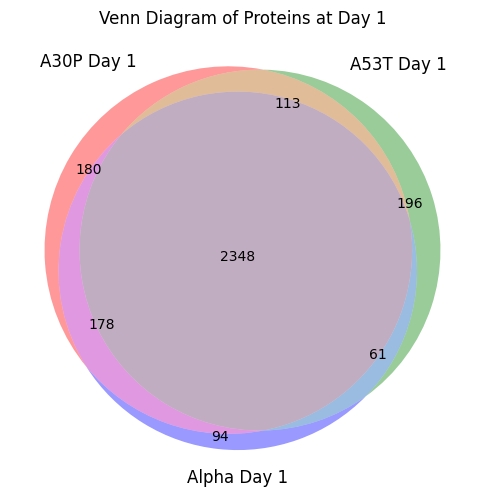

In [33]:
# Plot venn
plt.figure(figsize=(6, 6))
venn3([a30p_1, a53t_1, alpha_1],
      set_labels=("A30P Day 1", "A53T Day 1", "Alpha Day 1"))
plt.title("Venn Diagram of Proteins at Day 1")
plt.show()

In [24]:
# Ensure all column names are stripped of leading/trailing spaces
df.columns = [col.strip() for col in df.columns]

# Calculate mean for WT and DM replicates
df['Alpha_10_days_Mean'] = df[['Alpha _day_10_1', 'Alpha _day_10_2']].mean(axis=1)
df['A30P_day_10_Mean'] = df[['Alpha A30P_day_10_1', 'Alpha A30P_day_10_2']].mean(axis=1)
df['A53T_day_10_Mean'] = df[['Alpha A53T_day_10_1', 'Alpha A53T_day_10_2']].mean(axis=1)


In [30]:
alpha_10 = set(df[df["Alpha_10_days_Mean"] > 0]["Protein IDs"])
a30p_10 = set(df[df["A30P_day_10_Mean"] > 0]["Protein IDs"])
a53t_10 = set(df[df["A53T_day_10_Mean"] > 0]["Protein IDs"])

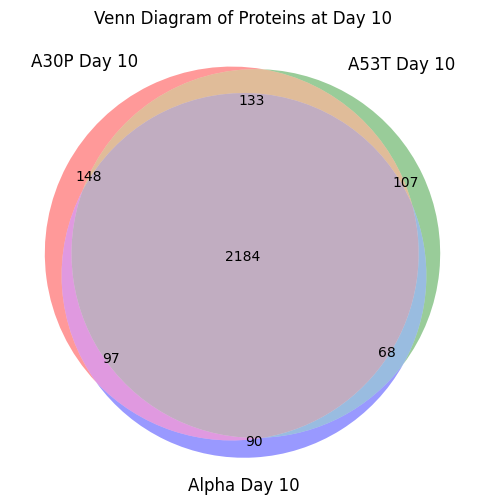

In [31]:
# Plot venn
plt.figure(figsize=(6, 6))
venn3([a30p_10, a53t_10, alpha_10],
      set_labels=("A30P Day 10", "A53T Day 10", "Alpha Day 10"))
plt.title("Venn Diagram of Proteins at Day 10")
plt.show()

In [28]:
# Ensure all column names are stripped of leading/trailing spaces
df.columns = [col.strip() for col in df.columns]

# Calculate mean for WT and DM replicates
df['Alpha_30_days_Mean'] = df[['Alpha _day_30_1', 'Alpha _day_30_2']].mean(axis=1)
df['A53T_day_30_Mean'] = df[['Alpha A53T_day_30_1', 'Alpha A53T_day_30_2']].mean(axis=1)


In [34]:
alpha_30 = set(df[df["Alpha_30_days_Mean"] > 0]["Protein IDs"])
a53t_30 = set(df[df["A53T_day_30_Mean"] > 0]["Protein IDs"])

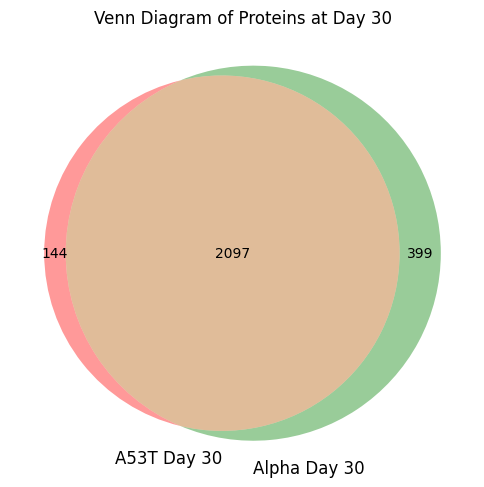

In [37]:
# Plot venn
plt.figure(figsize=(6, 6))
venn2([a53t_30, alpha_30],
      set_labels=("A53T Day 30", "Alpha Day 30"))
plt.title("Venn Diagram of Proteins at Day 30")
plt.show()

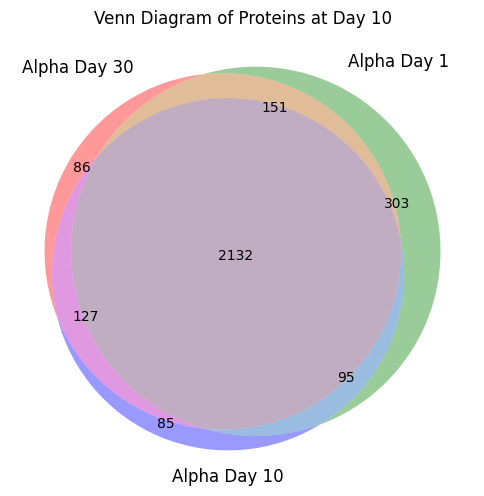

In [39]:
# Plot venn
plt.figure(figsize=(6, 6))
venn3([alpha_30, alpha_1, alpha_10],
      set_labels=("Alpha Day 30", "Alpha Day 1", "Alpha Day 10"))
plt.title("Venn Diagram of Proteins at Day 10")
plt.show()

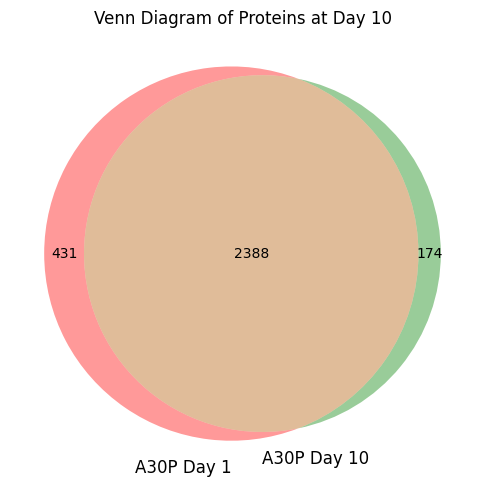

In [41]:
# Plot venn
plt.figure(figsize=(6, 6))
venn2([a30p_1, a30p_10],
      set_labels=("A30P Day 1", "A30P Day 10"))
plt.title("Venn Diagram of Proteins at Day 10")
plt.show()

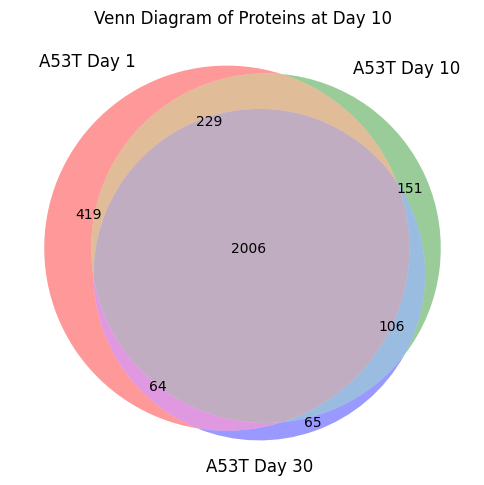

In [42]:
# Plot venn
plt.figure(figsize=(6, 6))
venn3([a53t_1, a53t_10, a53t_30],
      set_labels=("A53T Day 1", "A53T Day 10", "A53T Day 30"))
plt.title("Venn Diagram of Proteins at Day 10")
plt.show()